In [2]:
import awkward as ak
import matplotlib.pyplot as plt
import os, sys
import subprocess
import json
import uproot
from coffea.nanoevents import NanoEventsFactory, ScoutingNanoAODSchema, ScoutingJMENanoAODSchema
from coffea.lookup_tools.lookup_base import lookup_base
import numpy as np
from coffea import processor, util
from hist import Hist
import hist
from coffea.analysis_tools import Weights, PackedSelection
from collections import defaultdict
import mplhep
import math
plt.style.use(mplhep.style.CMS)

In [3]:
output = util.load("outfiles/Run3Summer22EE/fulllumi/jes_ScoutingPFMonitor_Run2022F-CHS_nonHadronicTriggers.coffea")[0]

(0.0, 2.0)

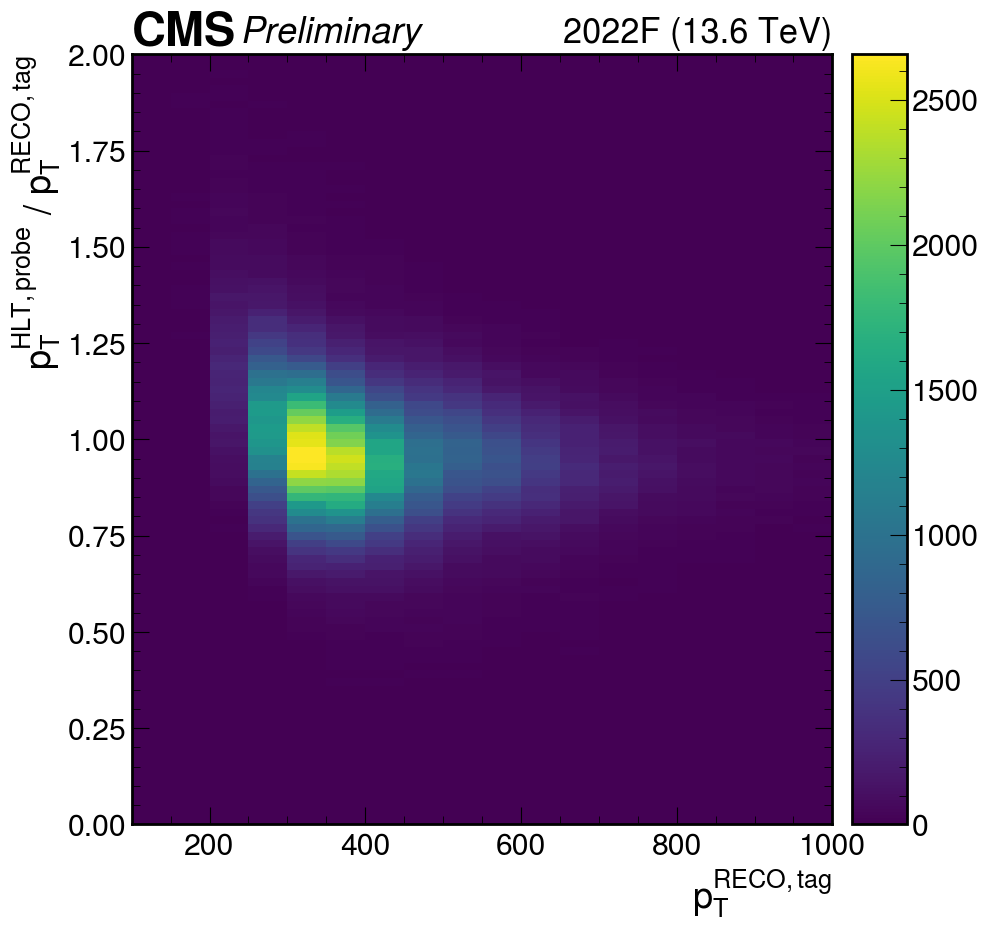

In [26]:
fig, ax = plt.subplots()

mplhep.hist2dplot(output["h1"], ax=ax)
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_ylim(0, 2)

Text(0.53, 0.9, '350.0 < $p_T^{RECO,tag}$ < 400.0')

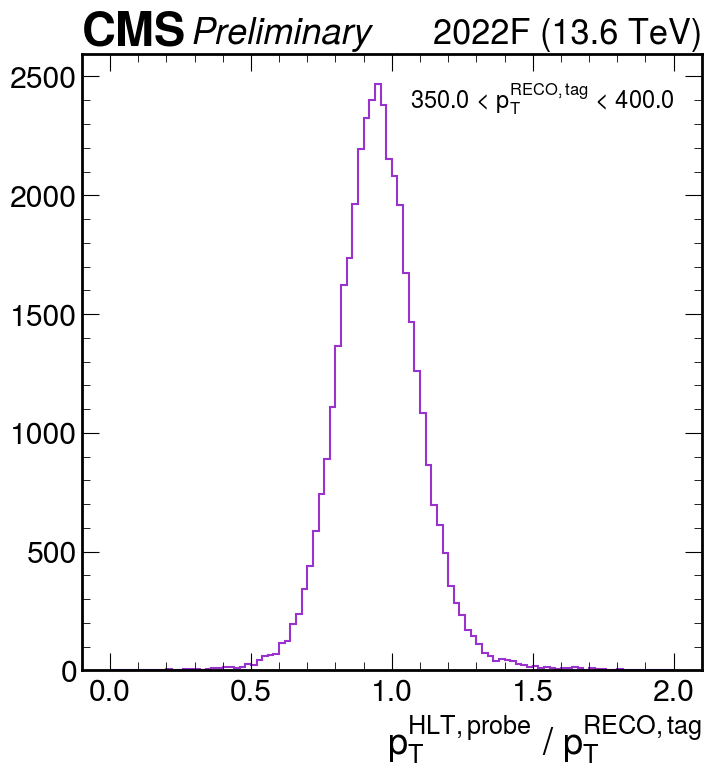

In [44]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_err(meanhist):
    return err(meanhist) / np.sqrt(2 * (meanhist.counts() - 1))

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots(figsize=(8, 8))

i = 5
h = output["h1"][{"pt" : i}]
edges = output["h1"].project("pt").axes[0].edges

mplhep.histplot(h, color="#9A32CD")
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.text(0.53, 0.9, f"{edges[i]}" + r" < $p_T^{RECO,tag}$ < " + f"{edges[i+1]}",
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
       )

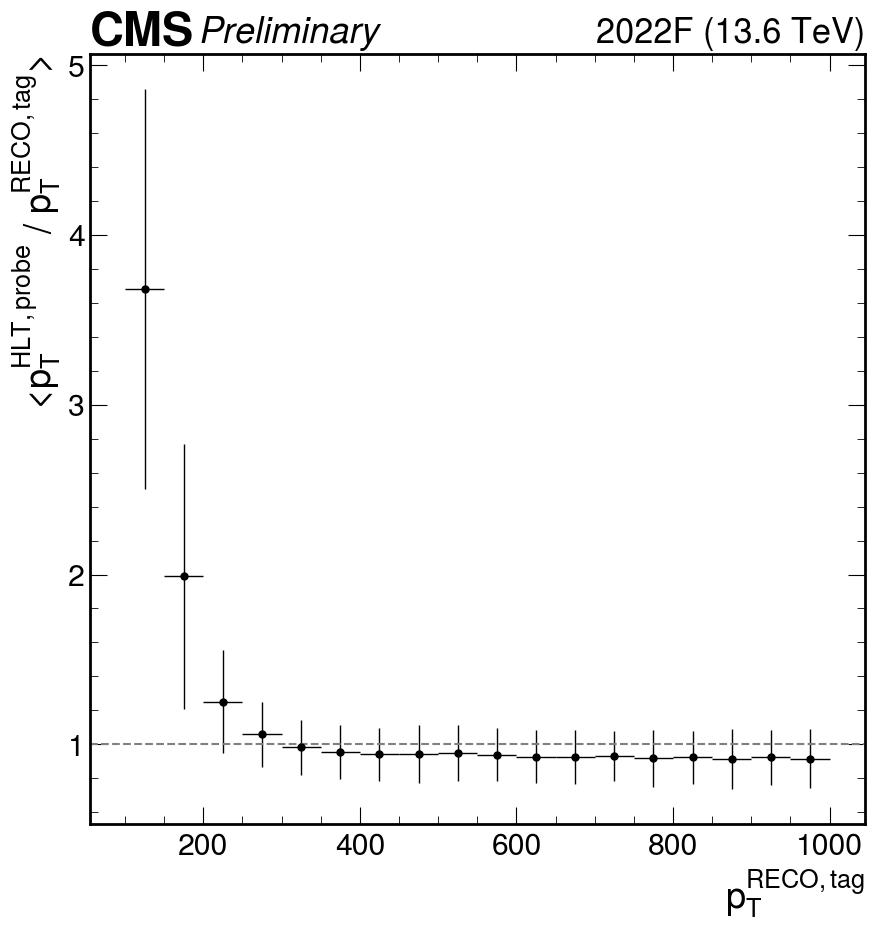

In [46]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots()

meanhist = output["h1_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    meanhist.values(),
    xerr=binwidth/2,
    yerr=err(meanhist),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,tag}$>")
ax.axhline(1, color='gray',ls='--')

(0.0, 2.0)

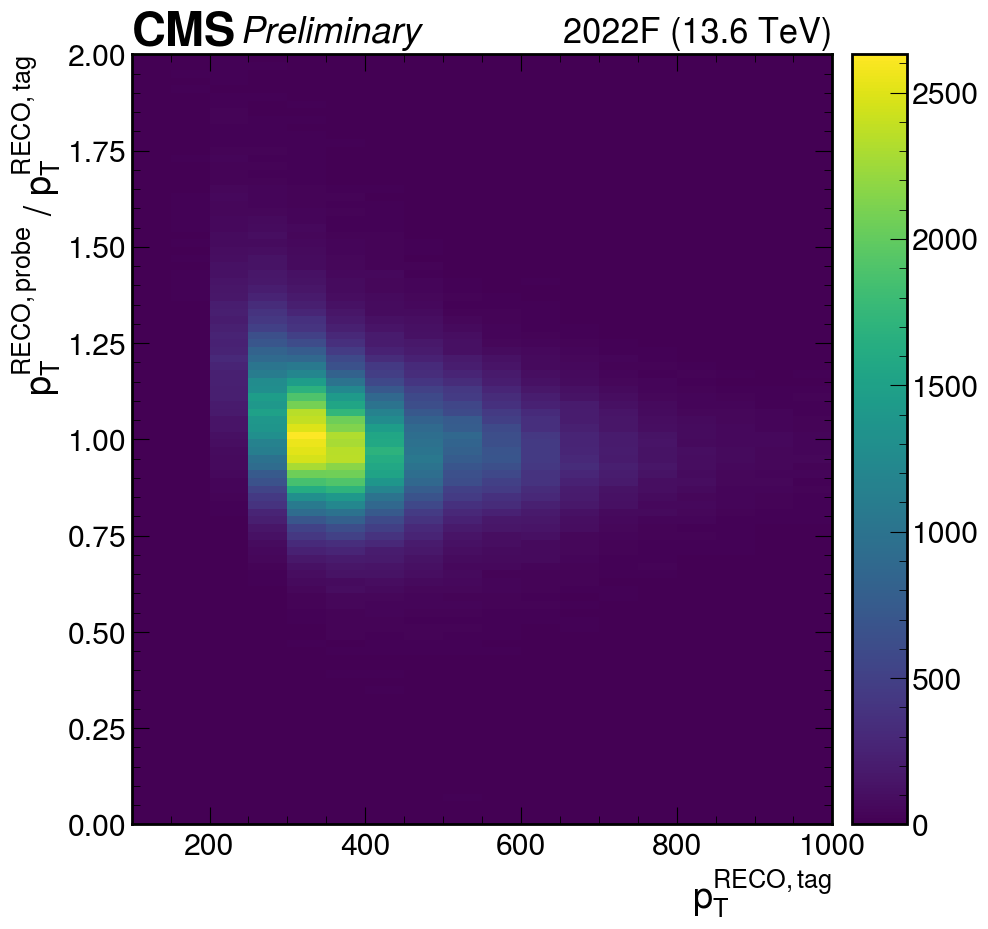

In [47]:
fig, ax = plt.subplots()

mplhep.hist2dplot(output["h2"], ax=ax)
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_ylim(0, 2)

Text(0.53, 0.9, '350.0 < $p_T^{RECO,tag}$ < 400.0')

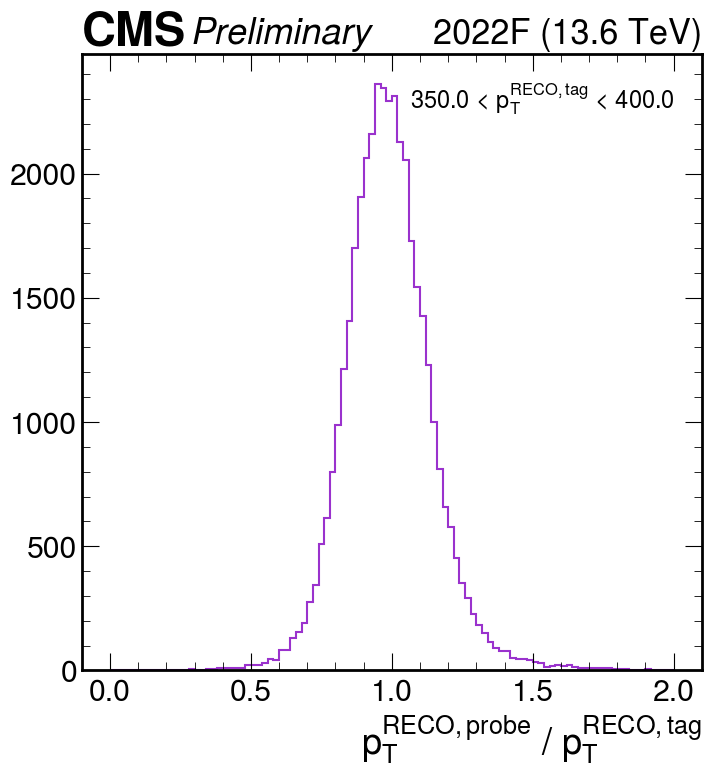

In [48]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_err(meanhist):
    return err(meanhist) / np.sqrt(2 * (meanhist.counts() - 1))

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots(figsize=(8, 8))

i = 5
h = output["h2"][{"pt" : i}]
edges = output["h2"].project("pt").axes[0].edges

mplhep.histplot(h, color="#9A32CD")
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.text(0.53, 0.9, f"{edges[i]}" + r" < $p_T^{RECO,tag}$ < " + f"{edges[i+1]}",
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
       )

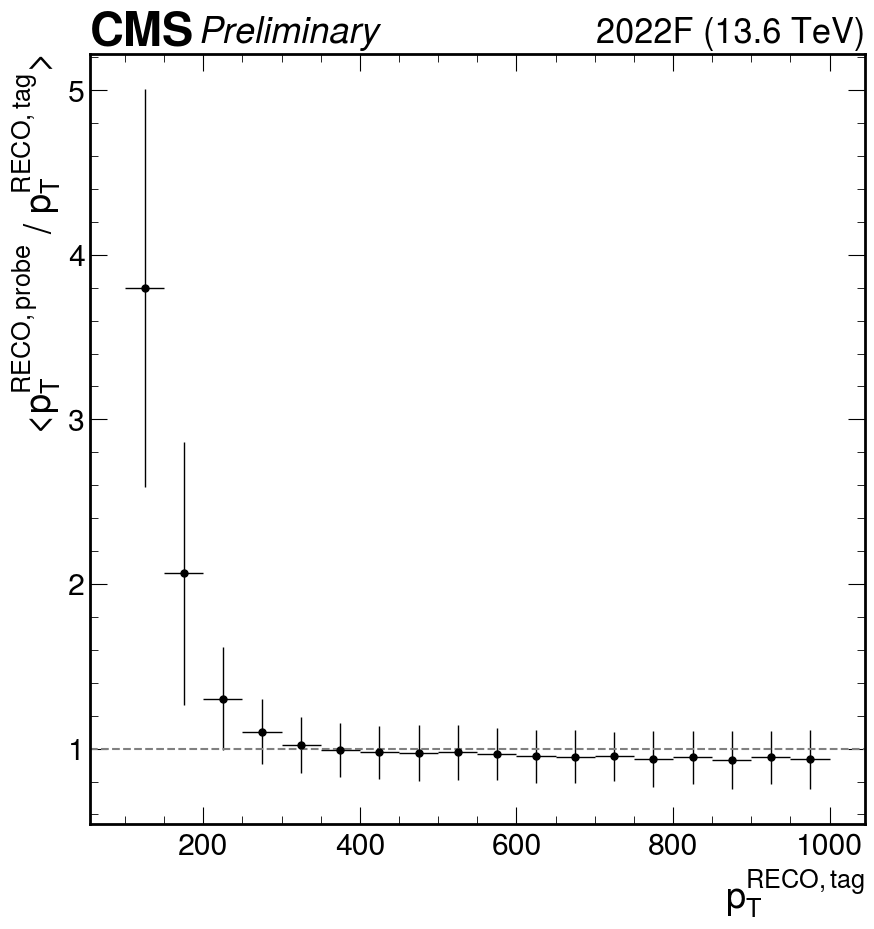

In [49]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots()

meanhist = output["h2_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    meanhist.values(),
    xerr=binwidth/2,
    yerr=err(meanhist),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{RECO,probe}$ / $p_T^{RECO,tag}$>")
ax.axhline(1, color='gray',ls='--')

(0.0, 2.0)

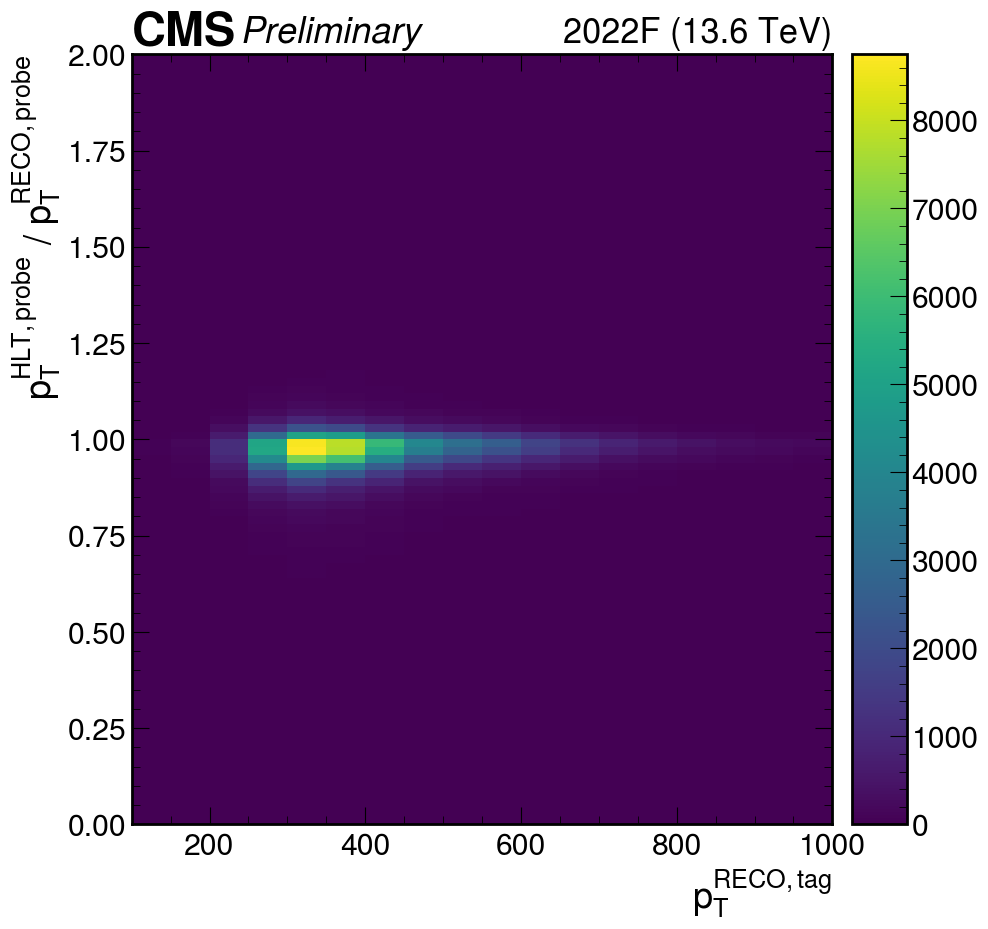

In [50]:
fig, ax = plt.subplots()

mplhep.hist2dplot(output["h3"], ax=ax)
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_ylim(0, 2)

Text(0.53, 0.9, '350.0 < $p_T^{RECO,tag}$ < 400.0')

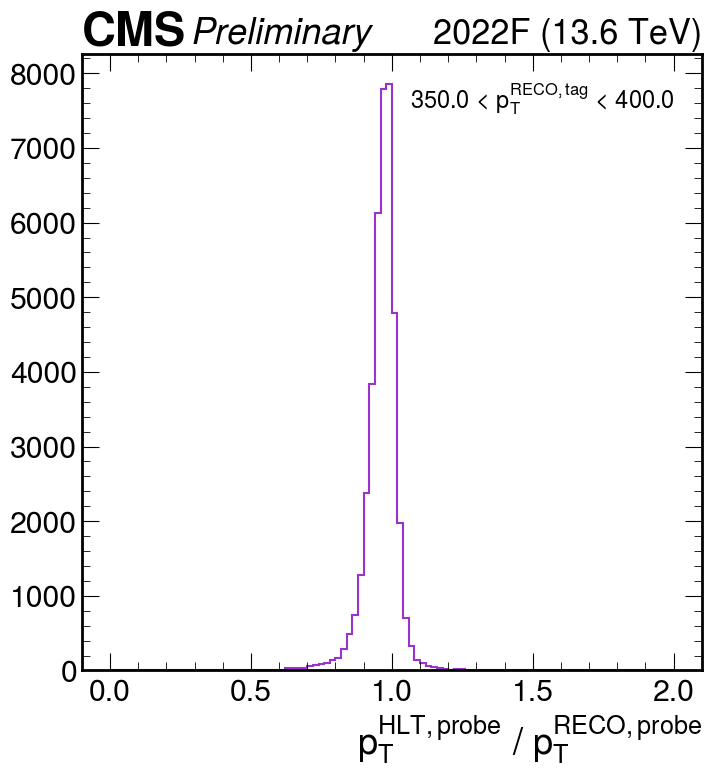

In [51]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_err(meanhist):
    return err(meanhist) / np.sqrt(2 * (meanhist.counts() - 1))

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots(figsize=(8, 8))

i = 5
h = output["h3"][{"pt" : i}]
edges = output["h3"].project("pt").axes[0].edges

mplhep.histplot(h, color="#9A32CD")
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.text(0.53, 0.9, f"{edges[i]}" + r" < $p_T^{RECO,tag}$ < " + f"{edges[i+1]}",
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
       )

(0.5, 1.5)

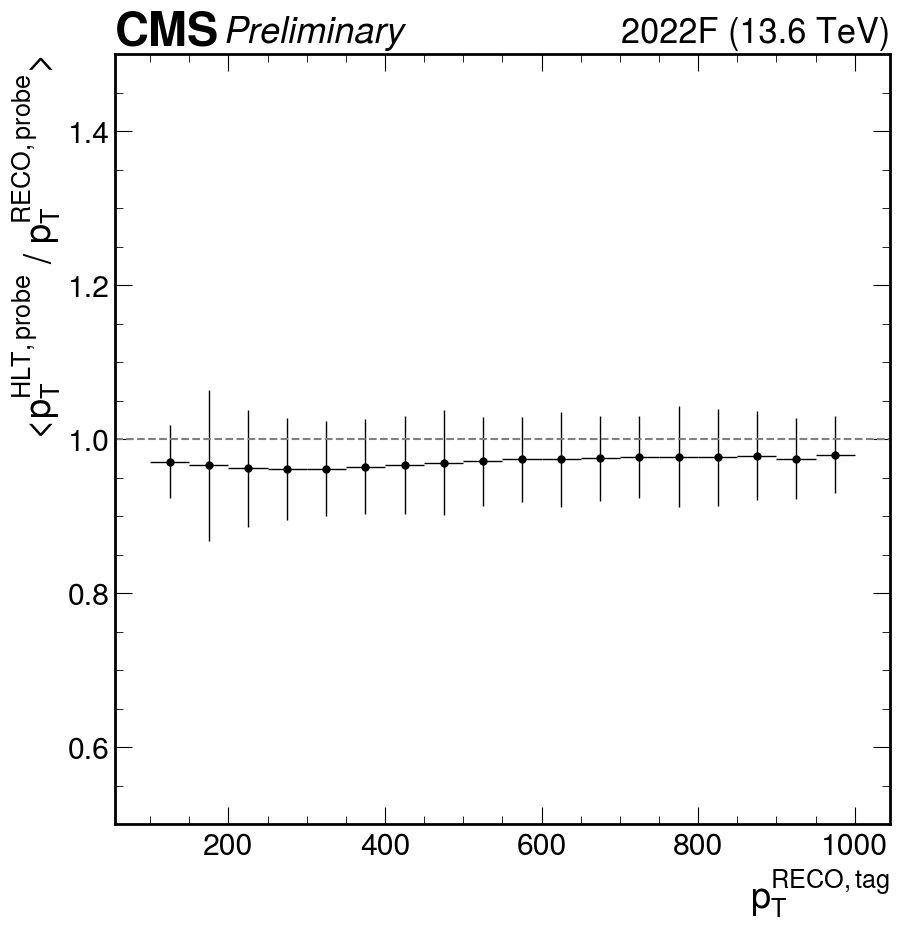

In [84]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots()

meanhist = output["h3_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    meanhist.values(),
    xerr=binwidth/2,
    yerr=err(meanhist),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,probe}$>")
ax.axhline(1, color='gray',ls='--')
ax.set_ylim(0.5,1.5)
#plt.yticks([0.6, 0.8, 0.98, 1.2, 1.4])

(-0.1, 0.2)

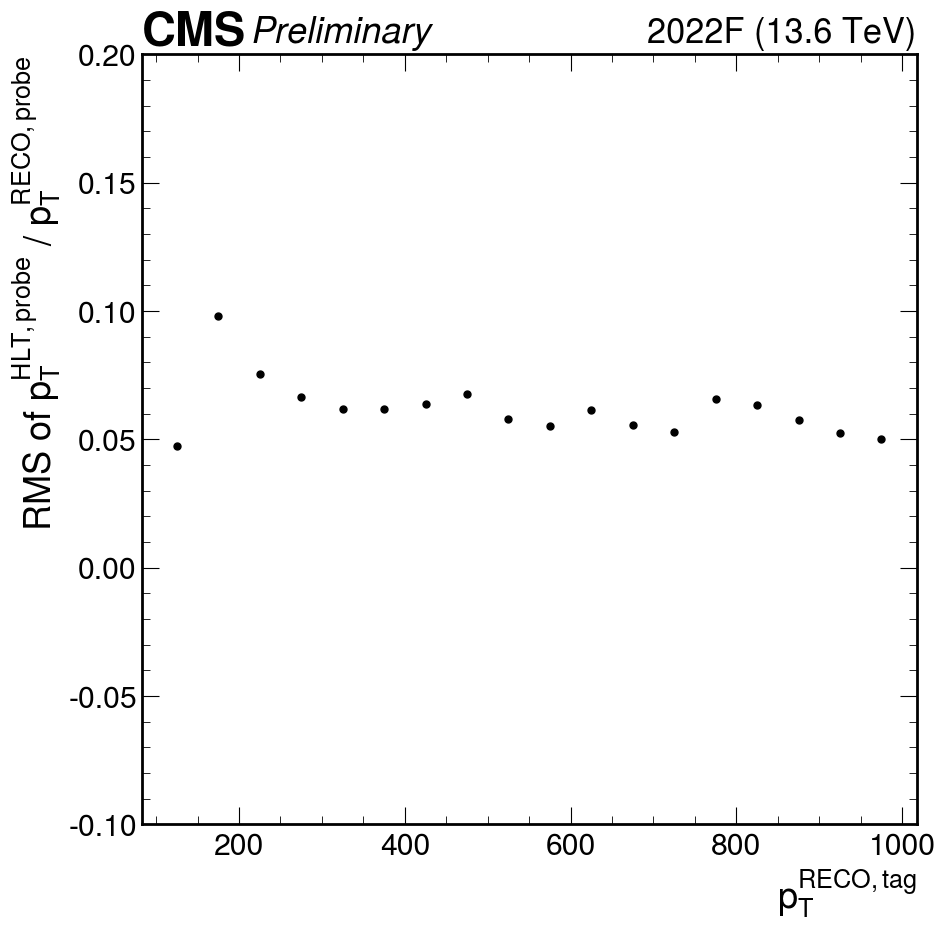

In [91]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots()

meanhist = output["h3_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    err(meanhist),
    #xerr=binwidth/2,
    #yerr=err(meanhist),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"RMS of $p_T^{HLT,probe}$ / $p_T^{RECO,probe}$")
#ax.axhline(1, color='gray',ls='--')
ax.set_ylim(-0.1,0.2)
#plt.yticks([0.6, 0.8, 0.98, 1.2, 1.4])

([<matplotlib.axis.XTick at 0x7f8687ad0190>,
 [Text(200, 0, '200'),
  Text(400, 0, '400'),
  Text(600, 0, '600'),
  Text(800, 0, '800'),
  Text(1000, 0, '1000')])

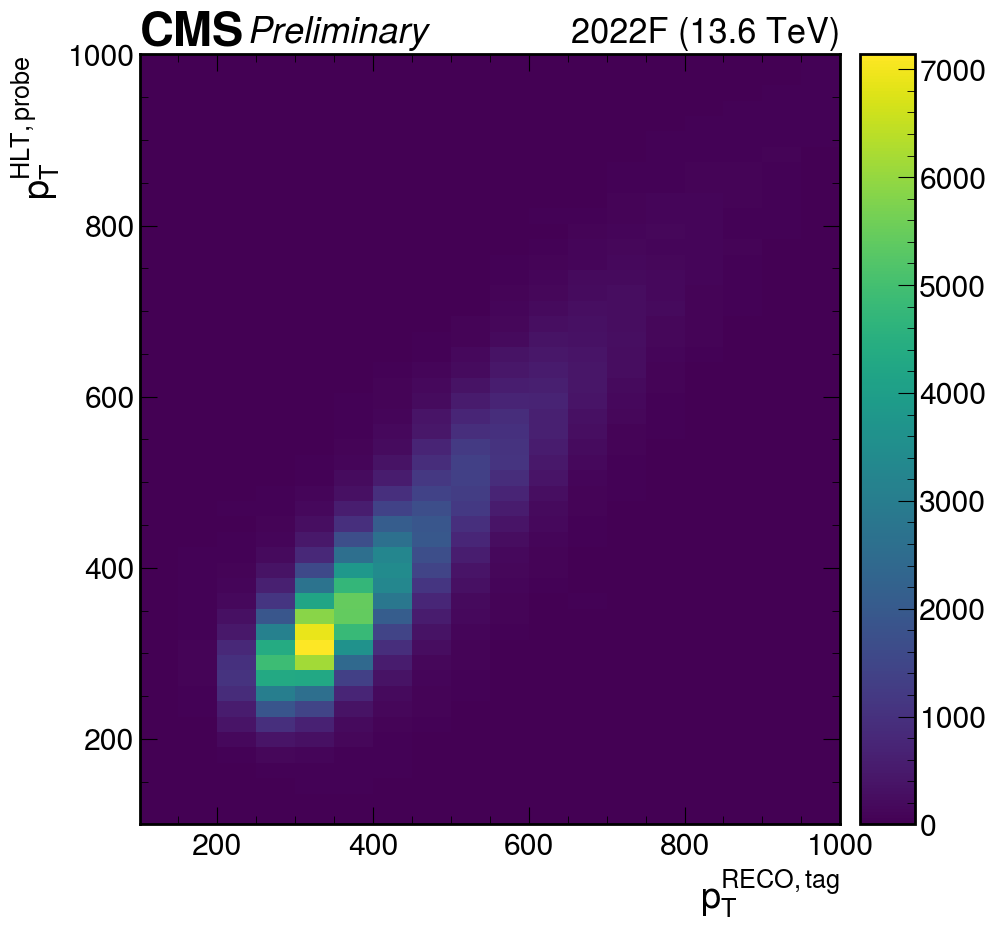

In [4]:
fig, ax = plt.subplots()

mplhep.hist2dplot(output["h4"], ax=ax)
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
plt.yticks([200, 400, 600, 800, 1000])
plt.xticks([200, 400, 600, 800, 1000])

Text(0.53, 0.9, '350.0 < $p_T^{RECO,tag}$ < 400.0')

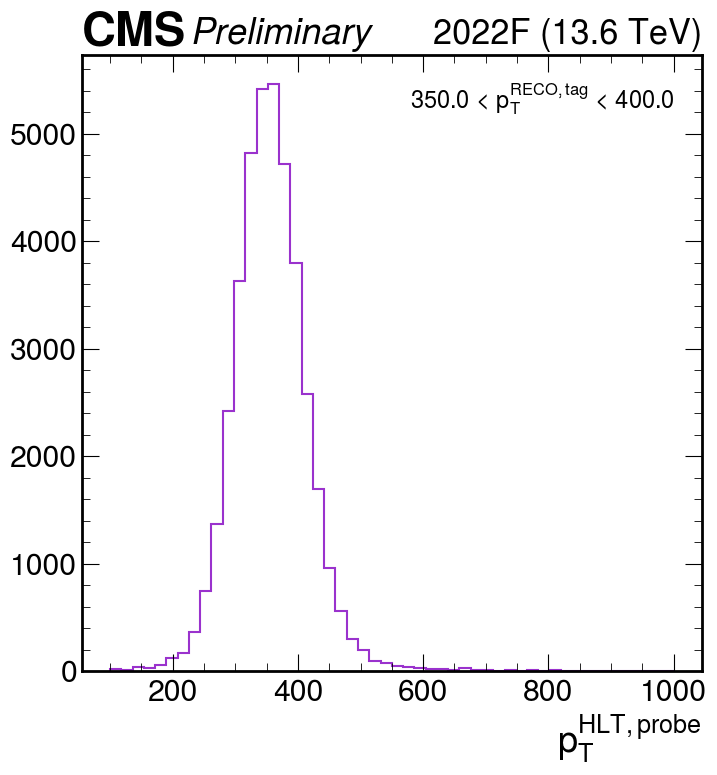

In [5]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_err(meanhist):
    return err(meanhist) / np.sqrt(2 * (meanhist.counts() - 1))

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots(figsize=(8, 8))

i = 5
h = output["h4"][{"pt_reco" : i}]
edges = output["h4"].project("pt_reco").axes[0].edges

mplhep.histplot(h, color="#9A32CD")
mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.text(0.53, 0.9, f"{edges[i]}" + r" < $p_T^{RECO,tag}$ < " + f"{edges[i+1]}",
        fontsize=17,
        horizontalalignment='left',
        verticalalignment='bottom',
        transform=ax.transAxes
       )

(0.0, 1100.0)

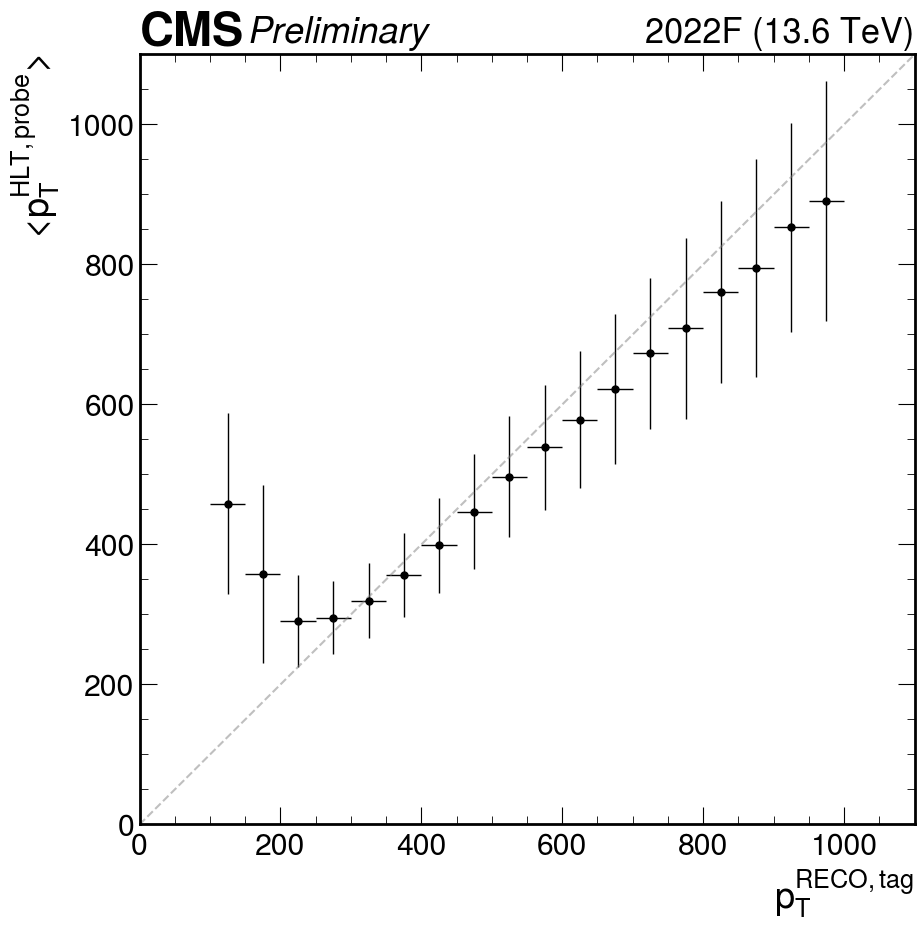

In [6]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

fig, ax = plt.subplots()

meanhist = output["h4_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    meanhist.values(),
    xerr=binwidth/2,
    yerr=err(meanhist),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$>")
ax.axline((0, 0), slope=1, c="gray", ls='--', alpha=0.5)
ax.set_ylim(0,1100)
ax.set_xlim(0,1100)

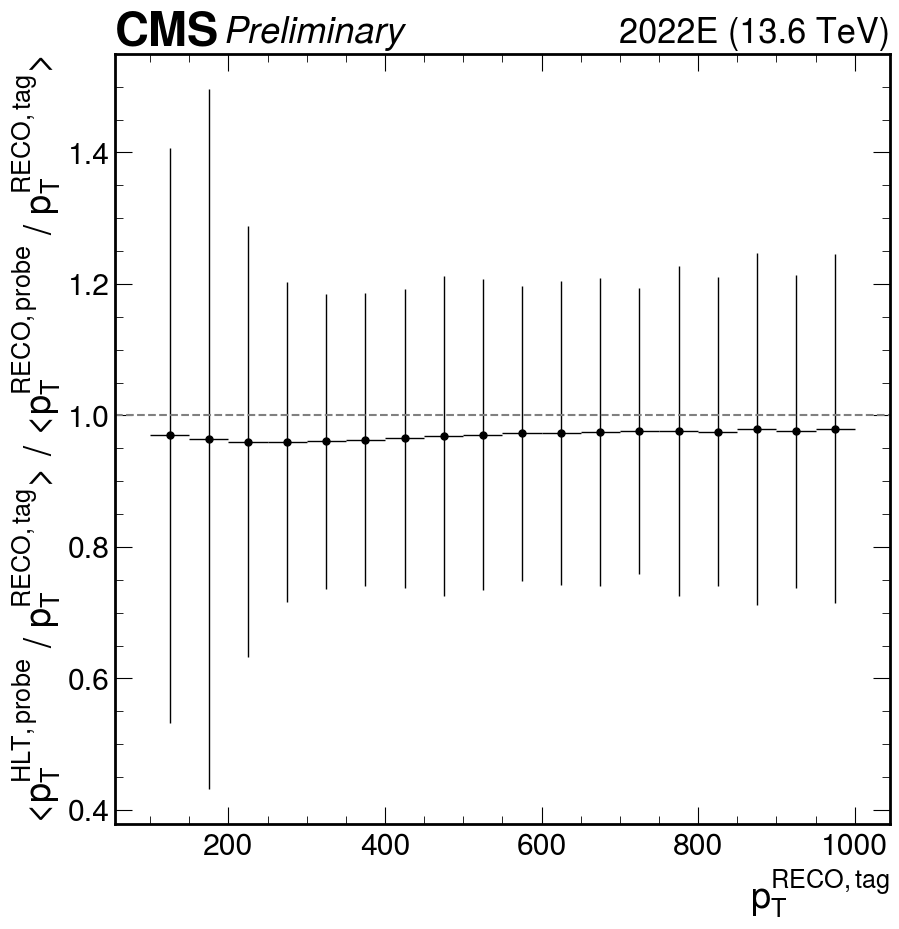

In [10]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots()

meanhist = output["h1_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    output["h1_mean"].values() / output["h2_mean"].values(),
    xerr=binwidth/2,
    yerr=err_prop(output["h1_mean"].values(), output["h2_mean"].values(), err(output["h1_mean"]), err(output["h2_mean"]),),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$ / $p_T^{RECO,tag}$> / <$p_T^{RECO,probe}$ / $p_T^{RECO,tag}$>")
ax.axhline(1, color='gray',ls='--')

([<matplotlib.axis.YTick at 0x7fcf49a38d00>,
 [Text(0, 0.6, '0.60'),
  Text(0, 0.8, '0.80'),
  Text(0, 0.98, '0.98'),
  Text(0, 1.2, '1.20'),
  Text(0, 1.4, '1.40')])

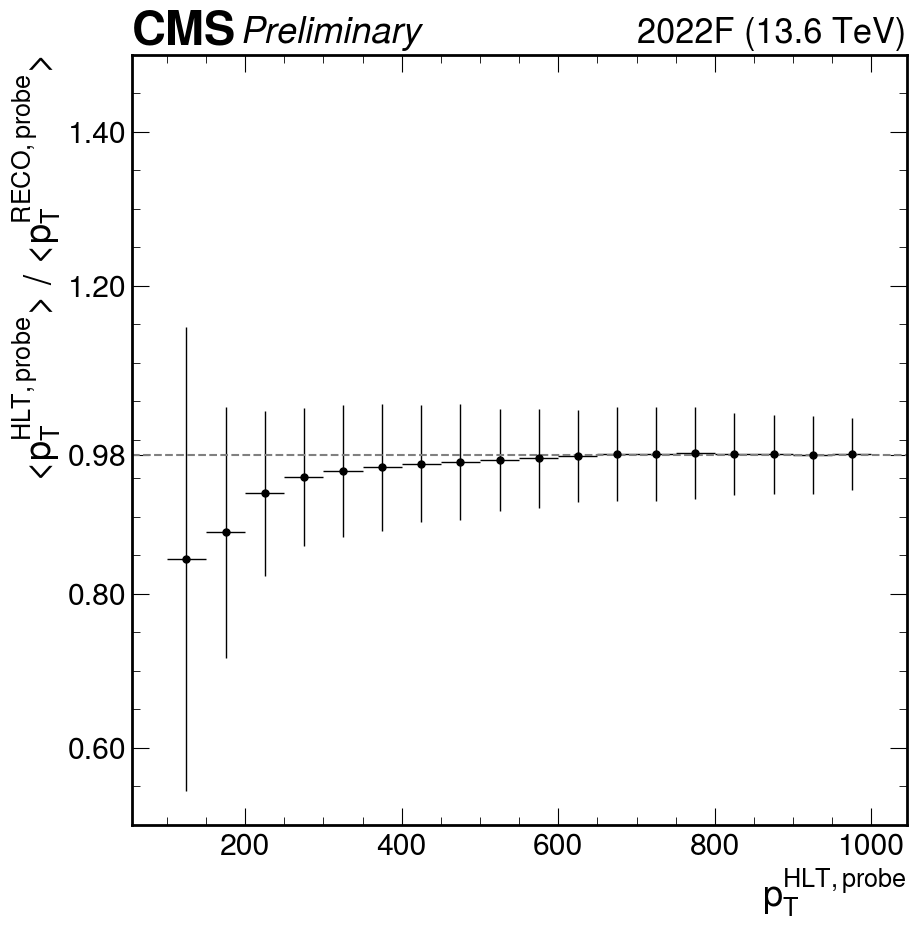

In [55]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots()

meanhist = output["hlt_probe_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    output["hlt_probe_mean"].values() / output["reco_probe_mean"].values(),
    xerr=binwidth/2,
    yerr=err_prop(output["hlt_probe_mean"].values(), output["reco_probe_mean"].values(), err(output["hlt_probe_mean"]), err(output["reco_probe_mean"]),),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{HLT,probe}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$>")
ax.axhline(0.98, color='gray',ls='--')
ax.set_ylim(0.5,1.5)
plt.yticks([0.6, 0.8, 0.98, 1.2, 1.4])

(0.0, 2.0)

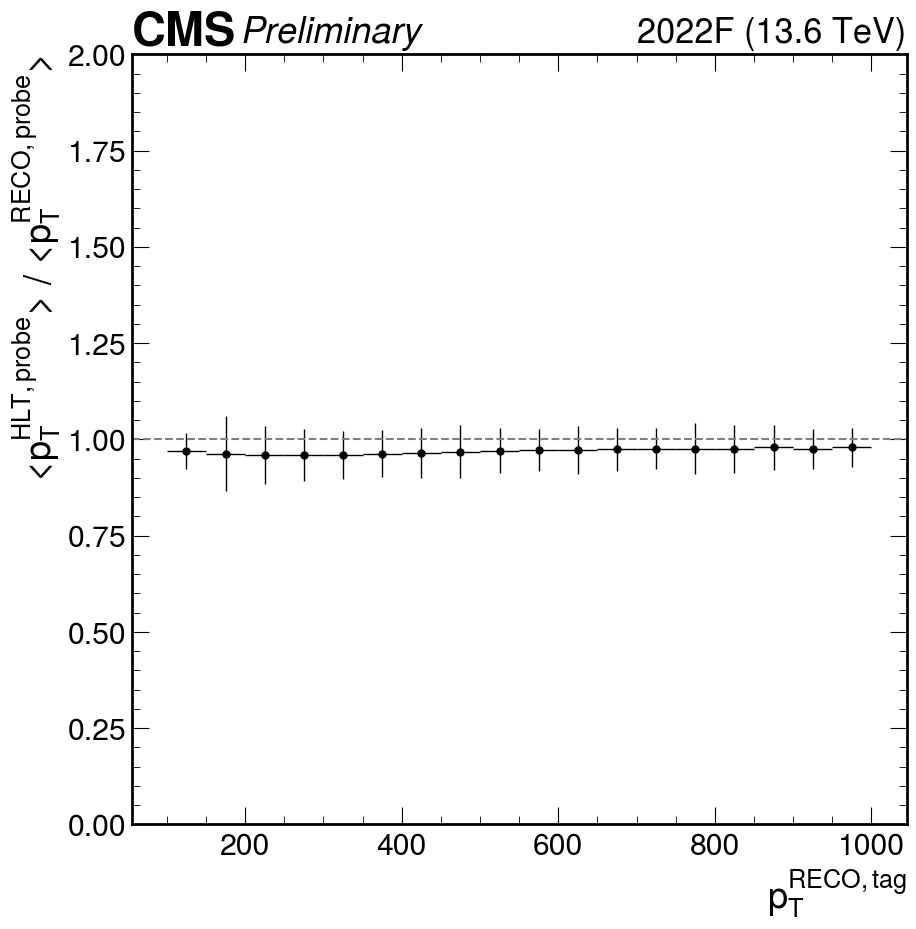

In [94]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots()

meanhist = output["h1_mean"]
binwidth = meanhist.axes[0].centers[2] - meanhist.axes[0].centers[1]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

ax.errorbar(
    meanhist.axes[0].centers,
    output["h1_mean"].values() / output["h2_mean"].values(),
    xerr=binwidth/2,
    yerr=err(output["h3_mean"]),
    #yerr=err_prop(output["h1_mean"].values(), output["h2_mean"].values(), err(output["h1_mean"]), err(output["h2_mean"]),),
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"$p_T^{RECO,tag}$")
ax.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$>")
ax.axhline(1, color='gray',ls='--')
ax.set_ylim(0, 2)

(0.0, 2.0)

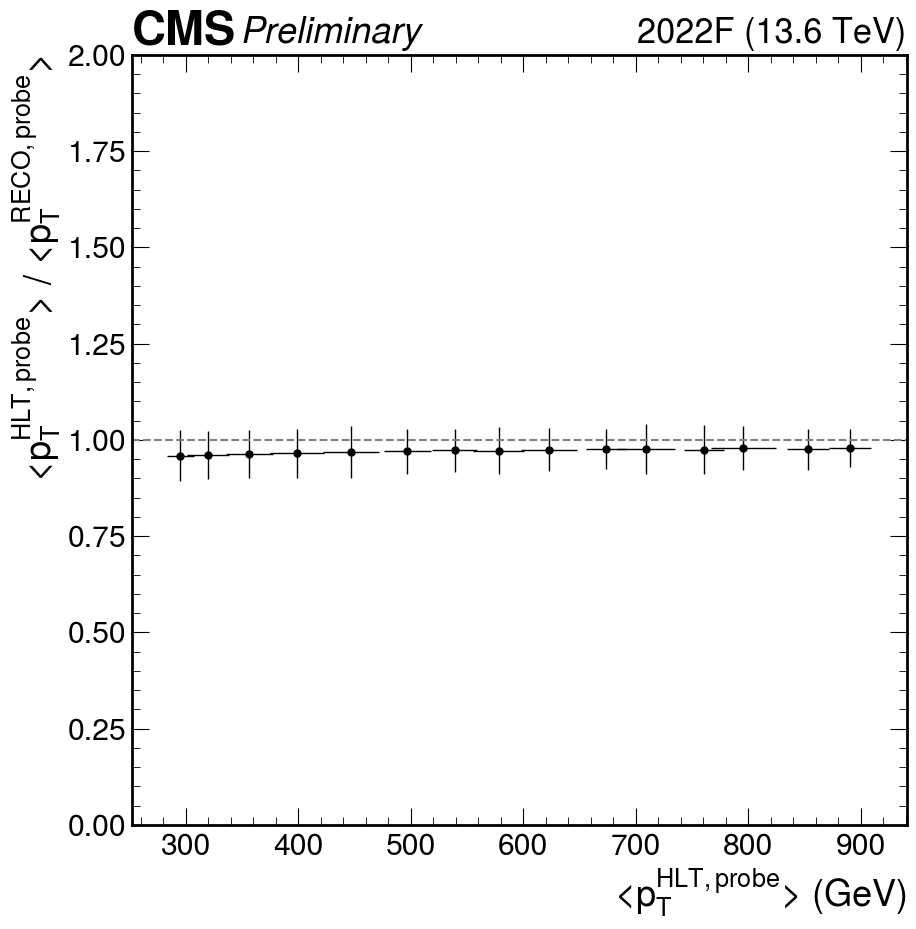

In [93]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots()

v = output["h4_mean"].values()
binwidth = [abs(v[i+1] - v[i])/2 if i < len(v) - 1 else abs(v[i] - v[i-1])/2 for i,_ in enumerate(v)]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            #'color': 'k',
            'elinewidth': 1,
        }

i = 3
ax.errorbar(
    output["h4_mean"].values()[i:],
    [h1 / h2 for h1, h2 in zip(output["h1_mean"].values(), output["h2_mean"].values())][i:],
    xerr=binwidth[i:],
    #yerr=[err / np.sqrt(n) for err, n in zip(err(output["h3_mean"]), output["h4_mean"].counts())][3:],
    yerr=err(output["h3_mean"])[i:],
    **data_err_opts,
    color="black",
)

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"<$p_T^{HLT,probe}$> (GeV)")
ax.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$>")
ax.axhline(1, color='gray',ls='--')
ax.set_ylim(0, 2)

In [57]:
xdata = output["h4_mean"].values()[i:]
ydata = [h1 / h2 - 1 for h1, h2 in zip(output["h1_mean"].values(), output["h2_mean"].values())][i:]

In [61]:
from scipy.optimize import curve_fit

# def func(x, p0, p1, p2):
#     return p0 + p1 * (0.01 * x)**p2

def func(x, p0, p1):
    return p0 + x * p1

popt, pcov = curve_fit(func, xdata, ydata)

(-1.0, 1.0)

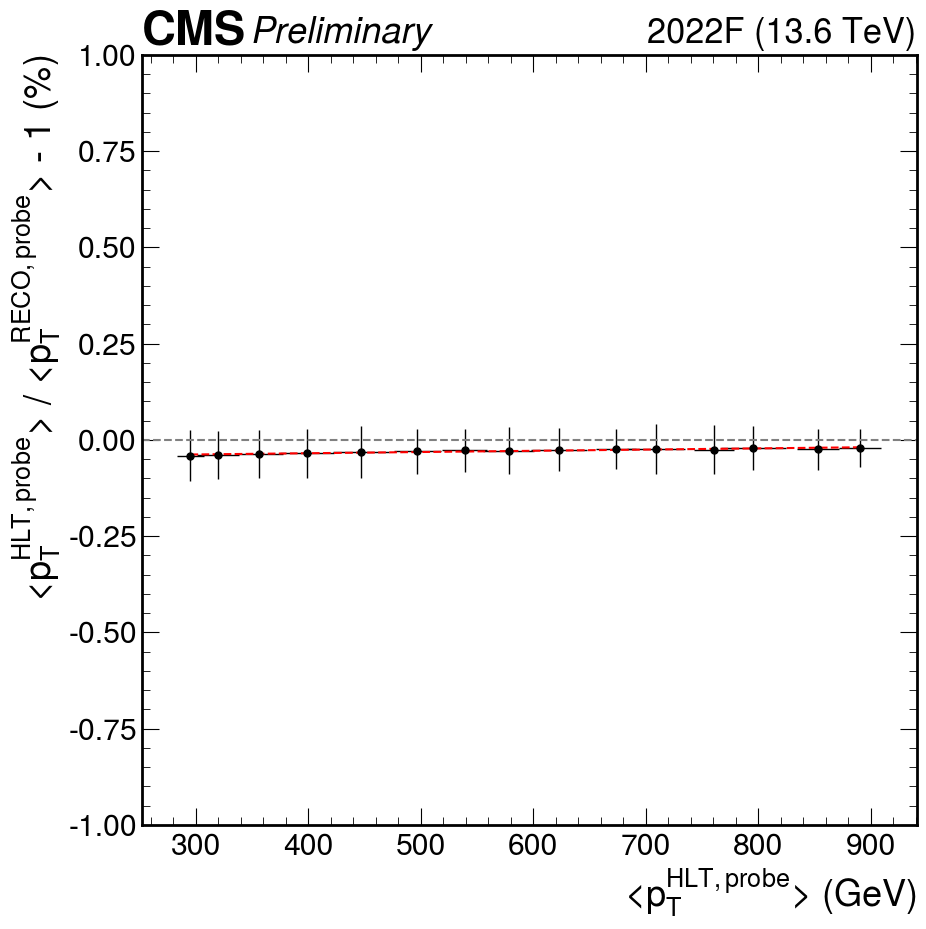

In [67]:
def err(meanhist):
    return np.sqrt(meanhist.variances()*meanhist.counts())

def err_prop(val_1, val_2, err_1, err_2):
    
    err = []
    
    for i in range(len(val_1)):
        tmp = (val_1[i] / val_2[i]) * np.sqrt((err_1[i] / val_1[i])**2 + (err_2[i] / val_2[i])**2)
        err.append(tmp)
        
    return err

fig, ax = plt.subplots()

v = output["h4_mean"].values()
binwidth = [abs(v[i+1] - v[i])/2 if i < len(v) - 1 else abs(v[i] - v[i-1])/2 for i,_ in enumerate(v)]

data_err_opts = {
            'linestyle': 'none',
            'marker': '.',
            'markersize': 10.,
            'color': 'k',
            'elinewidth': 1,
        }

i = 3
ax.errorbar(
    output["h4_mean"].values()[i:],
    [h1 / h2 - 1 for h1, h2 in zip(output["h1_mean"].values(), output["h2_mean"].values())][i:],
    xerr=binwidth[i:],
    #yerr=[err / np.sqrt(n) for err, n in zip(err(output["h3_mean"]), output["h4_mean"].counts())][3:],
    yerr=err(output["h3_mean"])[i:],
    **data_err_opts,
)

plt.plot(xdata, func(xdata, *popt), '--', c="red", label='fit: a=%5.3f, b=%5.3f' % tuple(popt))

mplhep.cms.label(ax=ax, data=True, year="2022F", com=13.6, label="Preliminary")
ax.set_xlabel(r"<$p_T^{HLT,probe}$> (GeV)")
ax.set_ylabel(r"<$p_T^{HLT,probe}$> / <$p_T^{RECO,probe}$> - 1 (%)")
ax.axhline(0, color='gray',ls='--')
ax.set_ylim(-1, 1)